# Introduction to K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K.

The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data
Labels for the training data (each data point is assigned to a single cluster)

Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents.  

### Business Use Cases
The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.
Some examples of use cases are:

Behavioral segmentation: 1) Segment by purchase history 2) Segment by activities on application, website, or platform 3) Define personas based on interests 4) Create profiles based on activity monitoring

Inventory categorization: 1) Group inventory by sales activity 2) Group inventory by manufacturing metrics

Sorting sensor measurements: 1) Detect activity types in motion sensors 2) Group images 3) Separate audio 4) Identify groups in health monitoring

Detecting bots or anomalies: 1) Separate valid activity groups from bots 2) Group valid activity to clean up outlier detection

In addition, monitoring if a tracked data point switches between groups over time can be used to detect meaningful changes in the data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
from sklearn.datasets.samples_generator import make_blobs

# Let's create 300 random samples with 2 features and target reponse will have 4 classes
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

print("Size of X dataset: ", X.shape)
print("Unique Clasess and their frequency:", np.unique(y_true, return_counts=True))

Size of X dataset:  (300, 2)
Unique Clasess and their frequency: (array([0, 1, 2, 3]), array([75, 75, 75, 75], dtype=int64))


We have used make_blobs function for generating isotropic Gaussian blobs for clustering. It generates array of numbers based on clusters provided as parameter and classes as output. The dataset generated can be used for multi-classification algorithm. AS you can observe, above we have created a dataset with 300 random samples (n_smaples = 300) of 2 features and 1 response variables. Response variable is categorized into 4 classes (centers=4) and hence, 300 observations are divided into equal parts of 75 observations mapped to each class.

You can get more info on make_blobs function here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

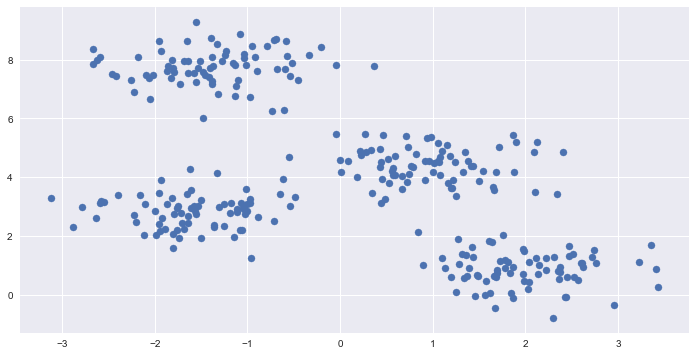

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn we have function for this algorithm "KMeans" to do this cluster prediction. http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

The KMeans algorithm finds the clusters and data set labels for a particular pre-chosen K. To find the number of clusters in the data, the user needs to run the K-means clustering algorithm for a range of K values and compare the results. In general, there is no method for determining exact value of K, but an accurate estimate can be obtained using the following techniques.

One of the metrics that is commonly used to compare results across different values of K is the mean distance between data points and their cluster centroid. Since increasing the number of clusters will always reduce the distance to data points, increasing K will always decrease this metric, to the extreme of reaching zero when K is the same as the number of data points.

So, let's see how the K value impacts the identification of cluster and centroid of cluster. Start by choosing K=2

In [4]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2) # Running KMeans algorithm with 2 clusters
kmeans_model.fit(X) # Fit the datset into the KMeans model
y_kmeans = kmeans_model.predict(X) # Predict the clusters

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

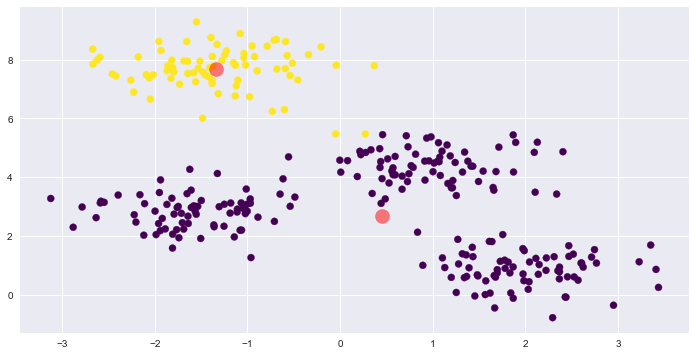

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

Visually, you can see that the K-means algorithm splits the two groups based on the distance feature. Each cluster centroid is marked with a black bold dot. However, we know visually that there can be more than 2 clusters for this kind of dataset. So, let's build the model with by choosing K=3 this time.

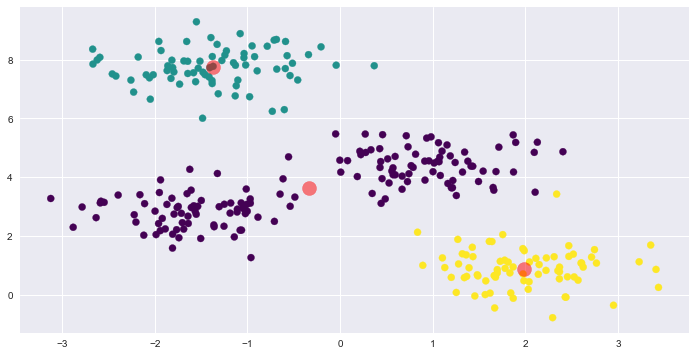

In [6]:
kmeans_model = KMeans(n_clusters=3) 
kmeans_model.fit(X) 
y_kmeans = kmeans_model.predict(X) 

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

Visually, you can see that this one is better than the first one but still we can improve this better. So, let's build the model with by choosing K=4 this time.

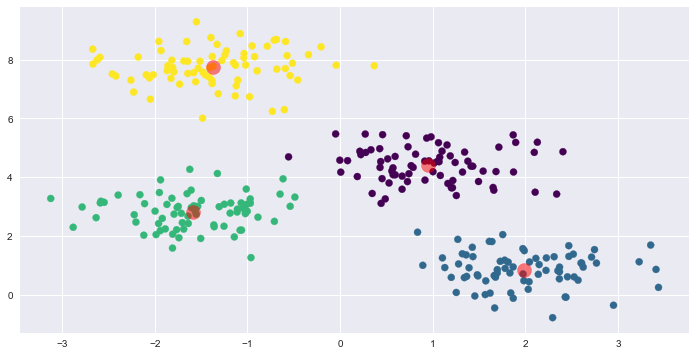

In [7]:
kmeans_model = KMeans(n_clusters=4) 
kmeans_model.fit(X) 
y_kmeans = kmeans_model.predict(X) 

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. However, in real world our dataset will not be so distinguishable visually. As mentioned previously, increasing the number of clusters will always reduce the distance to data points, increasing K will always decrease this metric, to the extreme of reaching zero when K is the same as the number of data points. Thus, this metric cannot be used as the sole target.

Instead, mean distance to the centroid as a function of K is plotted and the "elbow point," where the rate of decrease sharply shifts, can be used to roughly determine K. This plot is also known as "Elbow Plot"

For plotting "Elbow Plot" ans determining "elbow point", we will use the inertia parameter of KMeans model which will tell us the Cost or Total sum of squared distances of samples to their closest cluster center.

Apart from that, we will be using silhouette_score function to compute the mean Silhouette Coefficient of all samples. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

For more info on Silhouette Coefficient: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [8]:
from sklearn.metrics import silhouette_score

inertia_kmeans = []

for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    label = kmeans_model.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    inertia_kmeans.append(kmeans_model.inertia_)
    print("For K={}, For n_clusters={}, The K_means Silhouette Coefficient is {}".format(k, k, sil_coeff))

For K=2, For n_clusters=2, The K_means Silhouette Coefficient is 0.5426422297358302
For K=3, For n_clusters=3, The K_means Silhouette Coefficient is 0.5890390393551768
For K=4, For n_clusters=4, The K_means Silhouette Coefficient is 0.6819938690643478
For K=5, For n_clusters=5, The K_means Silhouette Coefficient is 0.5923875148758644
For K=6, For n_clusters=6, The K_means Silhouette Coefficient is 0.49219490077023903
For K=7, For n_clusters=7, The K_means Silhouette Coefficient is 0.4063081204075527
For K=8, For n_clusters=8, The K_means Silhouette Coefficient is 0.32205387813894615
For K=9, For n_clusters=9, The K_means Silhouette Coefficient is 0.34641081816285285
For K=10, For n_clusters=10, The K_means Silhouette Coefficient is 0.35421970332344377


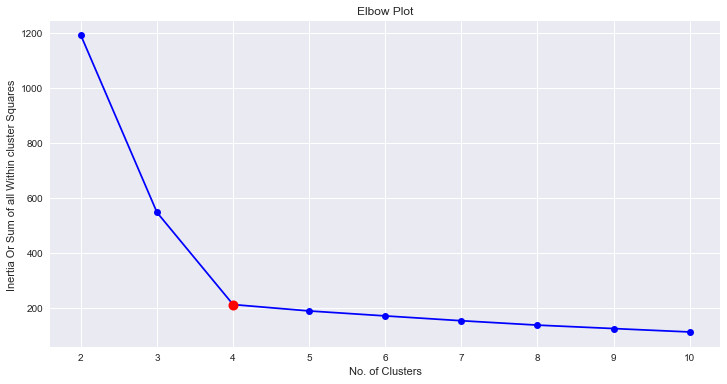

In [9]:
# Elbow Plot
plt.plot(range(2,11), inertia_kmeans, marker='o', color='b')
plt.title("Elbow Plot")
plt.ylabel("Inertia Or Sum of all Within cluster Squares ")
plt.xlabel("No. of Clusters")
plt.plot(4, inertia_kmeans[2], marker='o', markersize=10, color="red", label='elbow point K=4');

From the elbow plot, we can infer that KMeans algorithm works better when K=4 i.e. 4 clusters.

Let's take another real world example of Delivery Fleet Driver Data. Let's see how the K-means algorithm works with a sample dataset of delivery fleet driver data. For the sake of simplicity, we'll only be looking at two driver features: mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit

In [10]:
import pandas as pd
import urllib

driver_data_url = "https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/Delivery_Fleet_Driver_Data.csv"

driver_data = pd.read_csv(driver_data_url, delimiter="\t")
print(driver_data.head())
print('\nSize of driver dataset', driver_data.shape)

    Driver_ID  Distance_Feature  Speeding_Feature
0  3423311935             71.24              28.0
1  3423313212             52.53              25.0
2  3423313724             64.54              27.0
3  3423311373             55.69              22.0
4  3423310999             54.58              25.0

Size of driver dataset (4000, 3)


Driver dataset has 4000 observations and 3 variables, out of which we will be using Distance and Speed features to build our model and group the drivers. The chart below shows the dataset for 4,000 drivers, with the distance feature on the x-axis and speeding feature on the y-axis.

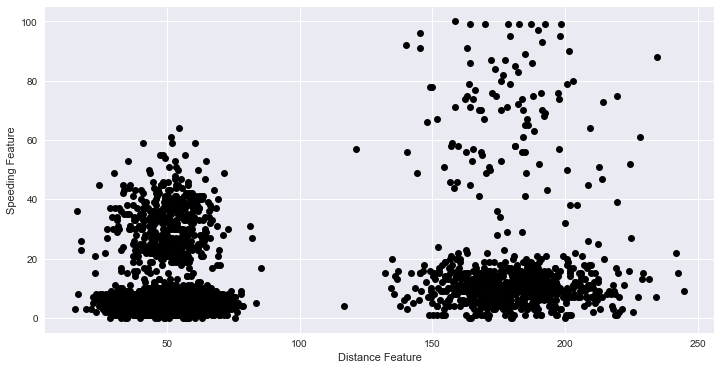

In [11]:
plt.plot(driver_data.Distance_Feature, driver_data.Speeding_Feature,'ko')
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature');

Let's run the algorithm with K=2, which is the minimum number of clusters that can exist in a dataset. The cluster labels are returned in kmeans.labels_. Also, visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator.

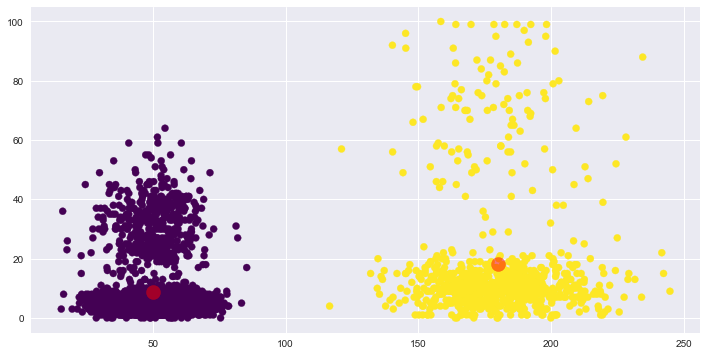

In [12]:
X = driver_data[['Distance_Feature', 'Speeding_Feature']] # We dont need Driver ID for building model

kmeans_model = KMeans(n_clusters=2) # Running KMeans algorithm with 2 clusters
kmeans_model.fit(X) # Fit the datset into the KMeans model
y_kmeans = kmeans_model.predict(X) # Predict the clusters

plt.scatter(X['Distance_Feature'], X['Speeding_Feature'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

Using domain knowledge of the dataset, we can infer that left side is urban drivers and right side is rural drivers, let's assume this. Now, let's try the algorithm with K=4 i.e. 4 clusters will be created distinguishing the dataset

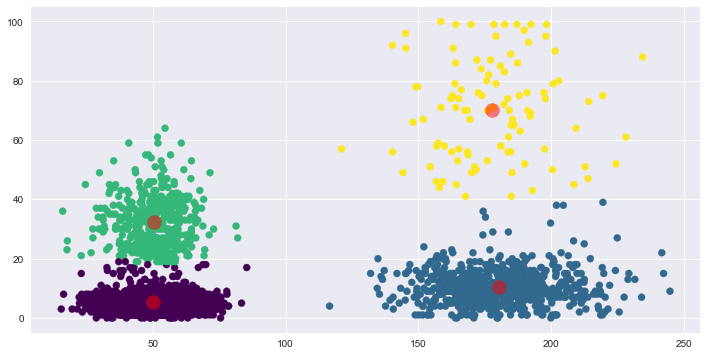

In [13]:
kmeans_model = KMeans(n_clusters=4) 
kmeans_model.fit(X) 
y_kmeans = kmeans_model.predict(X) 

plt.scatter(X['Distance_Feature'], X['Speeding_Feature'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

The chart below shows the resulting clusters. We see that four distinct groups have been identified by the algorithm; now speeding drivers have been separated from those who follow speed limits, in addition to the rural vs. urban divide. The threshold for speeding is lower with the urban driver group than for the rural drivers, likely due to urban drivers spending more time in intersections and stop-and-go traffic.

For K=2, For n_clusters=2, The K_means Silhouette Coefficient is 0.8490223286225532
For K=3, For n_clusters=3, The K_means Silhouette Coefficient is 0.8231396834167266
For K=4, For n_clusters=4, The K_means Silhouette Coefficient is 0.5907475009381601
For K=5, For n_clusters=5, The K_means Silhouette Coefficient is 0.5124291590153051
For K=6, For n_clusters=6, The K_means Silhouette Coefficient is 0.48546270016786447
For K=7, For n_clusters=7, The K_means Silhouette Coefficient is 0.4596919024775105
For K=8, For n_clusters=8, The K_means Silhouette Coefficient is 0.44919542756750114
For K=9, For n_clusters=9, The K_means Silhouette Coefficient is 0.44112448952925193
For K=10, For n_clusters=10, The K_means Silhouette Coefficient is 0.4200722083403329


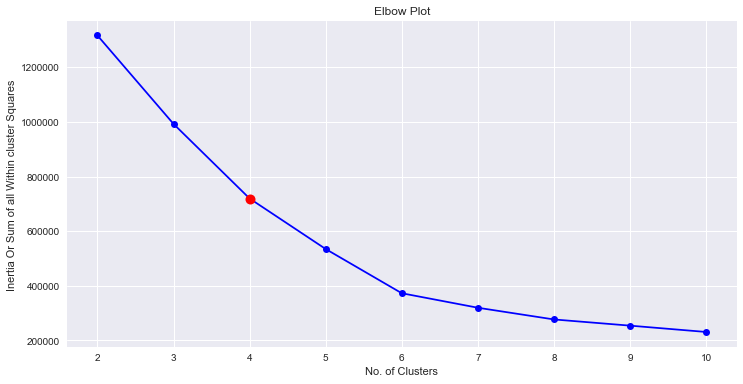

In [14]:
inertia_kmeans = []

for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    label = kmeans_model.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    inertia_kmeans.append(kmeans_model.inertia_)
    print("For K={}, For n_clusters={}, The K_means Silhouette Coefficient is {}".format(k, k, sil_coeff))

# Elbow Plot
plt.plot(range(2,11), inertia_kmeans, marker='o', color='b')
plt.title("Elbow Plot")
plt.ylabel("Inertia Or Sum of all Within cluster Squares ")
plt.xlabel("No. of Clusters")
plt.plot(4, inertia_kmeans[2], marker='o', markersize=10, color="red", label='elbow point K=4');

From the Elbow Plot, we can see that model can be evaluated for K=5 & K=6. You can try those combinations and try to visualize whether they really make sense. However, in real world scenario it will depend on the domain knowledge to choose the K value and whether clusters really make sense or not.

##### Additional Notes:

Feature engineering is the process of using domain knowledge to choose which data metrics to input as features into a machine learning algorithm. Feature engineering plays a key role in K-means clustering; using meaningful features that capture the variability of the data is essential for the algorithm to find all of the naturally-occurring groups.  

Categorical data (i.e., category labels such as gender, country, browser type) needs to be encoded or separated in a way that can still work with the algorithm.  

Feature transformations, particularly to represent rates rather than measurements, can help to normalize the data. For example, in the delivery fleet example above, if total distance driven had been used rather than mean distance per day, then drivers would have been grouped by how long they had been driving for the company rather than rural vs. urban.

For more information on K-means clustering, visit http://scikit-learn.org/stable/modules/clustering.html#k-means